In [1]:
import pandas as pd
weather = pd.read_csv("weather dataset.csv", index_col="DATE")

In [2]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
01-01-2000,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,79,NaN,70.0
02-01-2000,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,79,NaN,67.0
03-01-2000,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,77,83.0,NaN
04-01-2000,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,78,NaN,68.0
05-01-2000,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,80,NaN,71.0
...,...,...,...,...,...,...
21-08-2024,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,86,95.0,79.0
22-08-2024,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,87,NaN,80.0
23-08-2024,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,88,97.0,81.0


In [3]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [4]:
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.570555
TAVG       0.000000
TMAX       0.205604
TMIN       0.300567
dtype: float64

In [5]:
valid_columns = weather.columns[null_pct < 0.6]

In [6]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [7]:
weather =  weather[valid_columns].copy()

In [8]:
weather.columns = weather.columns.str.lower()

In [9]:
weather

,station,name,prcp,tavg,tmax,tmin
DATE,,,,,,
01-01-2000,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,79,NaN,70.0
02-01-2000,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,79,NaN,67.0
03-01-2000,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,77,83.0,NaN
04-01-2000,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,78,NaN,68.0
05-01-2000,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,80,NaN,71.0
...,...,...,...,...,...,...
21-08-2024,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,86,95.0,79.0
22-08-2024,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,87,NaN,80.0
23-08-2024,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,88,97.0,81.0


In [10]:
weather = weather.ffill()
weather = weather.bfill()

In [11]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
tavg       0
tmax       0
tmin       0
dtype: int64

In [12]:
weather.dtypes

station     object
name        object
prcp       float64
tavg         int64
tmax       float64
tmin       float64
dtype: object

In [13]:
weather.index

Index(['01-01-2000', '02-01-2000', '03-01-2000', '04-01-2000', '05-01-2000',
       '06-01-2000', '07-01-2000', '08-01-2000', '09-01-2000', '10-01-2000',
       ...
       '16-08-2024', '17-08-2024', '18-08-2024', '19-08-2024', '20-08-2024',
       '21-08-2024', '22-08-2024', '23-08-2024', '24-08-2024', '25-08-2024'],
      dtype='object', name='DATE', length=8993)

In [14]:
weather.index = pd.to_datetime(weather.index, format='%d-%m-%Y')

In [15]:
weather.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2024-08-16', '2024-08-17', '2024-08-18', '2024-08-19',
               '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23',
               '2024-08-24', '2024-08-25'],
              dtype='datetime64[ns]', name='DATE', length=8993, freq=None)

In [16]:
weather.apply(lambda x: (x==9999).sum())

station    0
name       0
prcp       0
tavg       0
tmax       0
tmin       0
dtype: int64

<Axes: xlabel='DATE'>

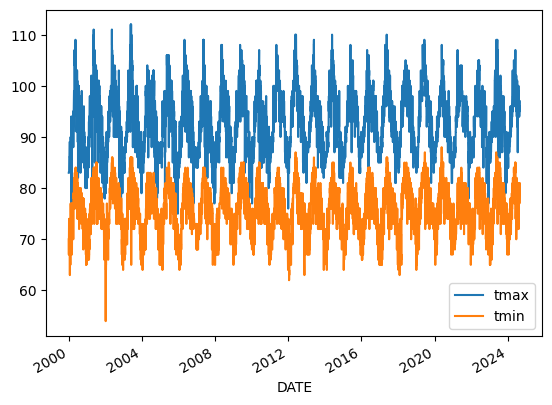

In [17]:
weather[["tmax","tmin"]].plot()

In [18]:
weather.index.year.value_counts().sort_index()

DATE
2000    366
2001    365
2002    364
2003    364
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    362
2022    365
2023    365
2024    232
Name: count, dtype: int64

<Axes: xlabel='DATE'>

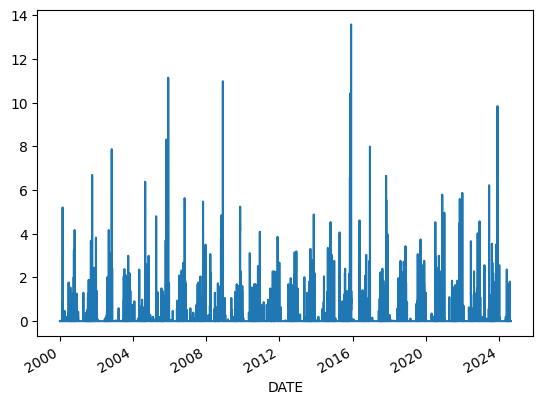

In [19]:
weather["prcp"].plot()

In [20]:
weather.groupby(weather.index.year).sum()["prcp"]

DATE
2000    41.06
2001    53.88
2002    46.20
2003    33.26
2004    51.03
2005    83.01
2006    53.89
2007    48.23
2008    63.21
2009    51.76
2010    53.38
2011    60.56
2012    38.67
2013    38.42
2014    45.90
2015    95.61
2016    47.60
2017    59.06
2018    36.37
2019    50.75
2020    58.62
2021    80.60
2022    54.80
2023    80.47
2024    22.24
Name: prcp, dtype: float64

In [21]:
#MEACHINE LEARNING MODEL TRAINING   

In [22]:
weather["target"] = weather.shift(-1)["tmax"]

In [23]:
weather

,station,name,prcp,tavg,tmax,tmin,target
DATE,,,,,,,
2000-01-01,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,79,83.0,70.0,83.0
2000-01-02,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,79,83.0,67.0,83.0
2000-01-03,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,77,83.0,67.0,83.0
2000-01-04,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,78,83.0,68.0,83.0
2000-01-05,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,80,83.0,71.0,83.0
...,...,...,...,...,...,...,...
2024-08-21,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,86,95.0,79.0,95.0
2024-08-22,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,87,95.0,80.0,97.0
2024-08-23,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,88,97.0,81.0,97.0


In [24]:
weather = weather.iloc[:-1,:].copy()

In [25]:
weather

,station,name,prcp,tavg,tmax,tmin,target
DATE,,,,,,,
2000-01-01,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,79,83.0,70.0,83.0
2000-01-02,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,79,83.0,67.0,83.0
2000-01-03,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,77,83.0,67.0,83.0
2000-01-04,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,78,83.0,68.0,83.0
2000-01-05,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,80,83.0,71.0,83.0
...,...,...,...,...,...,...,...
2024-08-20,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,88,95.0,77.0,95.0
2024-08-21,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,86,95.0,79.0,95.0
2024-08-22,IN020040900,"MADRAS MINAMBAKKAM, IN",0.0,87,95.0,80.0,97.0


In [26]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [27]:
predictors = ["prcp","tmax","tmin"]

In [28]:
train = weather.loc[:"2020-12-31"]

In [29]:
test = weather.loc["2021-01-01":]

In [30]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [31]:
predictions = reg.predict(test[predictors])

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(test["target"], predictions)

1.212254113057468

In [34]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual","predictions"]

In [35]:
combined

,actual,predictions
DATE,,
2021-01-01,85.0,85.623751
2021-01-02,85.0,85.623751
2021-01-03,85.0,86.090691
2021-01-04,86.0,85.779398
2021-01-05,86.0,86.554825
...,...,...
2024-08-20,95.0,94.864978
2024-08-21,95.0,95.176271
2024-08-22,97.0,95.331918


<Axes: xlabel='DATE'>

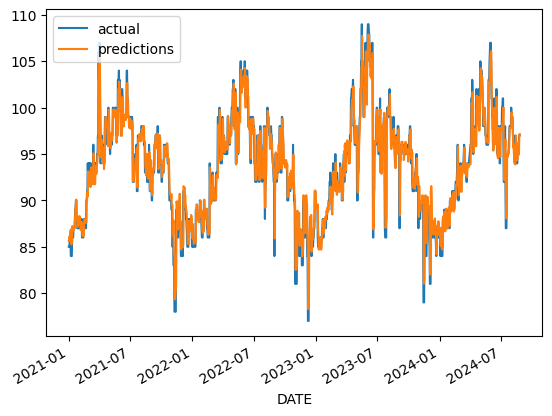

In [36]:
combined.plot()

In [37]:
reg.coef_

array([-0.03124724,  0.83073488,  0.15564638])

In [85]:
def create_predictions(predictors, weather, reg):
    train = weather.loc[:"2020-12-31"]
    test = weather.loc["2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual","predictions"]
    return error,combined

In [86]:
weather["month_max"] = weather["tmax"].rolling(30).mean()

In [87]:
weather["month_day_max"] = weather["month_max"]/weather["tmax"]

In [88]:
weather["max_min"]=weather["tmax"]/weather["tmin"]

In [89]:
predictors = ["prcp","tmax","tmin","month_max","month_day_max","max_min"]

In [97]:
weather = weather.iloc[30:,:].copy()

In [98]:
error, combined = create_predictions(predictors, weather, reg)

In [99]:
error

1.2100822816867653

<Axes: xlabel='DATE'>

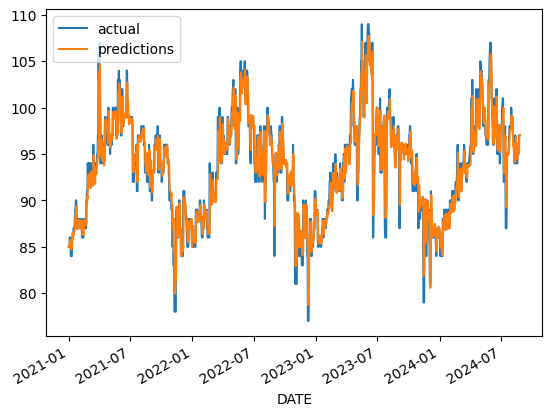

In [100]:
combined.plot()

In [101]:
weather["monthly_avg"] = weather["tmax"].groupby(weather.index.month).transform(lambda x: x.expanding(1).mean())


In [102]:
weather

,station,name,prcp,tavg,tmax,tmin,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,,,
2000-05-30,IN020040900,"MADRAS MINAMBAKKAM, IN",0.00,89,103.0,81.0,96.0,101.733333,0.987702,1.271605,103.000000,103.00
2000-05-31,IN020040900,"MADRAS MINAMBAKKAM, IN",0.00,87,96.0,82.0,100.0,101.600000,1.058333,1.170732,99.500000,96.00
2000-06-01,IN020040900,"MADRAS MINAMBAKKAM, IN",0.00,86,100.0,82.0,96.0,101.633333,1.016333,1.219512,100.000000,100.00
2000-06-02,IN020040900,"MADRAS MINAMBAKKAM, IN",0.04,85,96.0,82.0,95.0,101.600000,1.058333,1.170732,98.000000,96.00
2000-06-03,IN020040900,"MADRAS MINAMBAKKAM, IN",0.00,86,95.0,82.0,91.0,101.533333,1.068772,1.158537,97.000000,95.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-20,IN020040900,"MADRAS MINAMBAKKAM, IN",0.00,88,95.0,77.0,95.0,96.366667,1.014386,1.233766,95.517693,94.96
2024-08-21,IN020040900,"MADRAS MINAMBAKKAM, IN",0.00,86,95.0,79.0,95.0,96.366667,1.014386,1.202532,95.517016,94.04
2024-08-22,IN020040900,"MADRAS MINAMBAKKAM, IN",0.00,87,95.0,80.0,97.0,96.366667,1.014386,1.187500,95.516340,94.56


In [117]:
weather["day_of_year_avg"] = weather["tmax"].groupby(weather.index.day_of_year).transform(lambda x: x.expanding(1).mean())


In [118]:
predictors = ["prcp","tmax","tmin","month_max","month_day_max","max_min","day_of_year_avg","monthly_avg"]

In [119]:
error, combined = create_predictions(predictors, weather, reg)

In [120]:
error

1.2142937171146877

In [121]:

reg.coef_

array([-2.15411988e-01,  7.71828260e-01,  3.56173577e-01, -2.48902325e-01,
        2.76137221e+01,  1.78563234e+01,  2.55041385e-02,  1.63302009e-01])

In [125]:
combined["diff"] = (combined["actual"]-combined["predictions"]).abs()
combined.sort_values("diff", ascending = False).head()

,actual,predictions,diff
DATE,,,
2023-06-18,86.0,99.781819,13.781819
2021-03-30,106.0,96.156381,9.843619
2023-11-14,79.0,88.530586,9.530586
2022-08-31,84.0,93.080153,9.080153
2022-10-31,81.0,89.821295,8.821295
